# Diffusion Coefficient Calculation

Calculation is done using Mathematica. The notebook is available [here](./20_main.nb).

## Setup

In [1]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
import warnings
warnings.filterwarnings('ignore')

plt.style.use(['science', 'notebook'])

## Diffusion Coefficient of EMIC waves

In [2]:
D_EMIC_elfin =pl.read_csv('../data/03_primary/D_EMIC_elfin.csv')
D_EMIC_est =pl.read_csv('../data/03_primary/D_EMIC_est.csv')
D_EMIC_est_high =pl.read_csv('../data/03_primary/D_EMIC_est_high.csv')

In [3]:
properties = dict(
    xlabel="Energy (keV)",
    ylabel=r"$D_{\alpha\alpha} \, (s^{-1})$",
    yscale="log",
    # xlim=(400, 2250),
    # ylim=(9e-6, 1.2e-1),
)

[Text(0.5, 0, 'Energy (keV)'),
 Text(0, 0.5, '$D_{\\alpha\\alpha} \\, (s^{-1})$'),
 None]

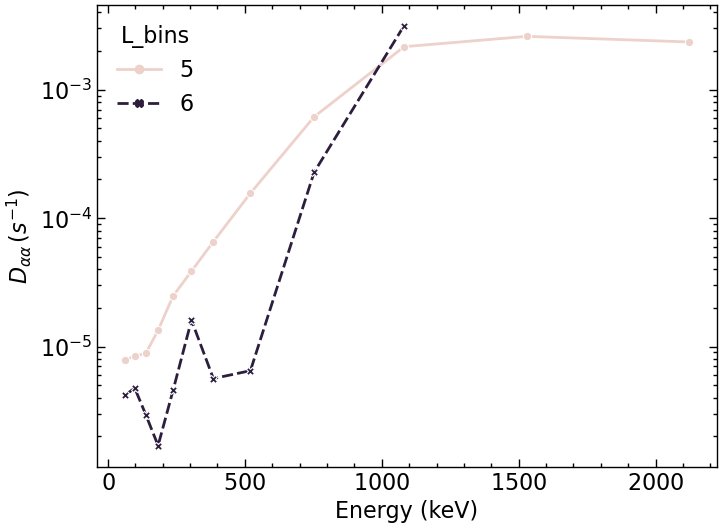

In [4]:
# with sns.plotting_context('talk'):
pa = sns.lineplot(
    data=D_EMIC_elfin, x="energy", y="Daa", hue="L_bins", style="L_bins", markers=True
)
pa.set(**properties)
# pa.get_figure().savefig("../figures/Daa_a.pdf")

In [5]:
def plot_Daa_3col():
    fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(12, 9))

    # Plot data from df_a on the first subplot
    sns.lineplot(
        data=D_EMIC_elfin, x="energy", y="Daa", hue="L_bins", legend=False, ax=axs[0]
    )

    sns.scatterplot(
        data=D_EMIC_elfin, x="energy", y="Daa", hue="L_bins", legend=False, ax=axs[0]
    )

    # Plot data from df_b_filtered on the second subplot
    sns.lineplot(
        data=D_EMIC_est,
        x="energy",
        y="Daa",
        hue="L_bins",
        style="k",
        markers=True,
        ax=axs[1],
        legend=False,
    )

    L_col_name = r"$L$"
    k_col_name = r"$f_{pe}/f_{ce}$"
    D_EMIC_est_high_formatted = D_EMIC_est_high.with_columns(
        pl.col("L_bins").alias(L_col_name), pl.col("k").cast(pl.Utf8).alias(k_col_name)
    )
    # Plot data from df_b_filtered on the second subplot
    sns.lineplot(
        data=D_EMIC_est_high_formatted,
        x="energy",
        y="Daa",
        hue=L_col_name,
        style=k_col_name,
        markers=True,
        ax=axs[2],
    )

    # Annotate the first subplot
    axs[0].text(0.02, 0.85, r"(a) ELFIN", transform=axs[0].transAxes, size=15)

    # Annotate the second subplot
    axs[1].text(
        0.02,
        0.85,
        r"(b) $\omega_{\mathrm{EMIC}}/\Omega_{cp} \sim 0.4$",
        transform=axs[1].transAxes,
        size=15,
    )

    axs[2].text(
        0.02,
        0.85,
        r"(c) $\omega_{\mathrm{EMIC}}/\Omega_{cp} \sim 0.7$",
        transform=axs[2].transAxes,
        size=15,
    )


    for ax in axs:
        ax.set(**properties)


    plt.tight_layout()
    plt.show()
    fig.savefig("../figures/Daa.pdf")

In [22]:
L_col = r"$L$"
k_col = r"$f_{pe}/f_{ce}$"

def format_D_EMIC(df):
    return df.with_columns(
        pl.col("L_bins").alias(L_col), pl.col("k").cast(pl.Utf8).alias(k_col)
    )

D_EMIC_est_formatted = D_EMIC_est.pipe(format_D_EMIC)
D_EMIC_est_high_formatted = D_EMIC_est_high.pipe(format_D_EMIC)


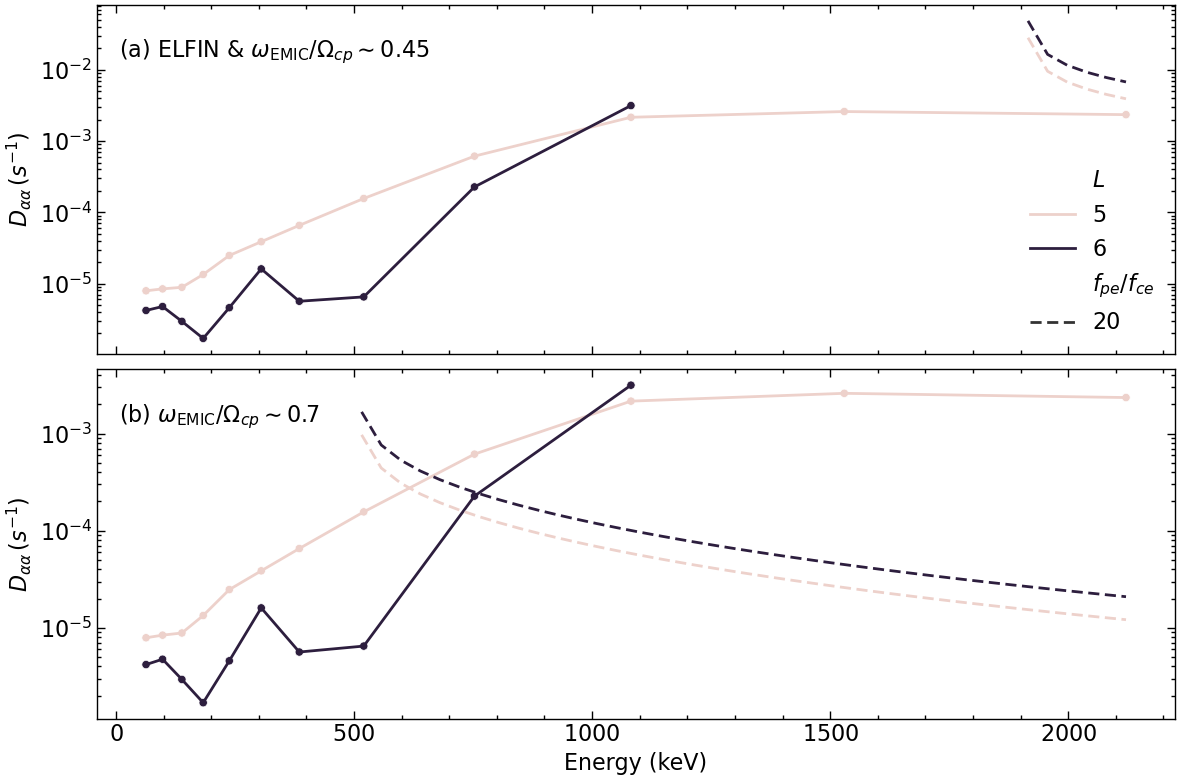

In [31]:

fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(12, 8))
dashes = [(4, 2), (1, 1)]

def line_scatter_plot(df, ax, x="energy", y="Daa", hue="L_bins"):
    sns.lineplot(data=df, x=x, y=y, hue=hue, legend=False, ax=ax)
    sns.scatterplot(data=df, x=x, y=y, hue=hue, legend=False, ax=ax)

line_scatter_plot(D_EMIC_elfin, axs[0])
line_scatter_plot(D_EMIC_elfin, axs[1])


# Plot data from df_b_filtered on the second subplot
sns.lineplot(
    data=D_EMIC_est_formatted,
    x="energy",
    y="Daa",
    hue=L_col,
    style=k_col,
    dashes=dashes,  # Adjust the dashes to your specific needs
    ax=axs[0],
    legend=True,
)

# Plot data from df_b_filtered on the second subplot
sns.lineplot(
    data=D_EMIC_est_high_formatted,
    x="energy",
    y="Daa",
    hue=L_col,
    style=k_col,
    dashes=dashes,  # Adjust the dashes to your specific needs
    ax=axs[1],
    legend=False,
)

axs[0].legend(loc="lower right")

# Annotate the first subplot
axs[0].text(
    0.02,
    0.85,
    r"(a) ELFIN & $\omega_{\mathrm{EMIC}}/\Omega_{cp} \sim 0.45$",
    transform=axs[0].transAxes,
    size=16,
)

axs[1].text(
    0.02,
    0.85,
    r"(b) $\omega_{\mathrm{EMIC}}/\Omega_{cp} \sim 0.7$",
    transform=axs[1].transAxes,
    size=16,
)

for ax in axs:
    ax.set(**properties)


plt.tight_layout()
plt.show()
fig.savefig("../figures/Daa.pdf")

## Diffusion Coefficient of Chorus waves

In [68]:
chours_ratio_1 = 0.15
chours_ratio_2 = 0.31
D_chorus_1 = pl.read_csv(f'../data/03_primary/D_chorus_wch_{chours_ratio_1}.csv')
D_chorus_2 = pl.read_csv(f'../data/03_primary/D_chorus_wch_{chours_ratio_2}.csv')

In [69]:
def dotlineplot(
    data=None, *, x=None, y=None, hue=None, legend="auto", ax=None, **kwargs
):
    sns.lineplot(data=data, x=x, y=y, hue=hue, legend=legend, ax=ax, **kwargs)

    sns.scatterplot(data=data, x=x, y=y, hue=hue, legend=legend, ax=ax, **kwargs)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

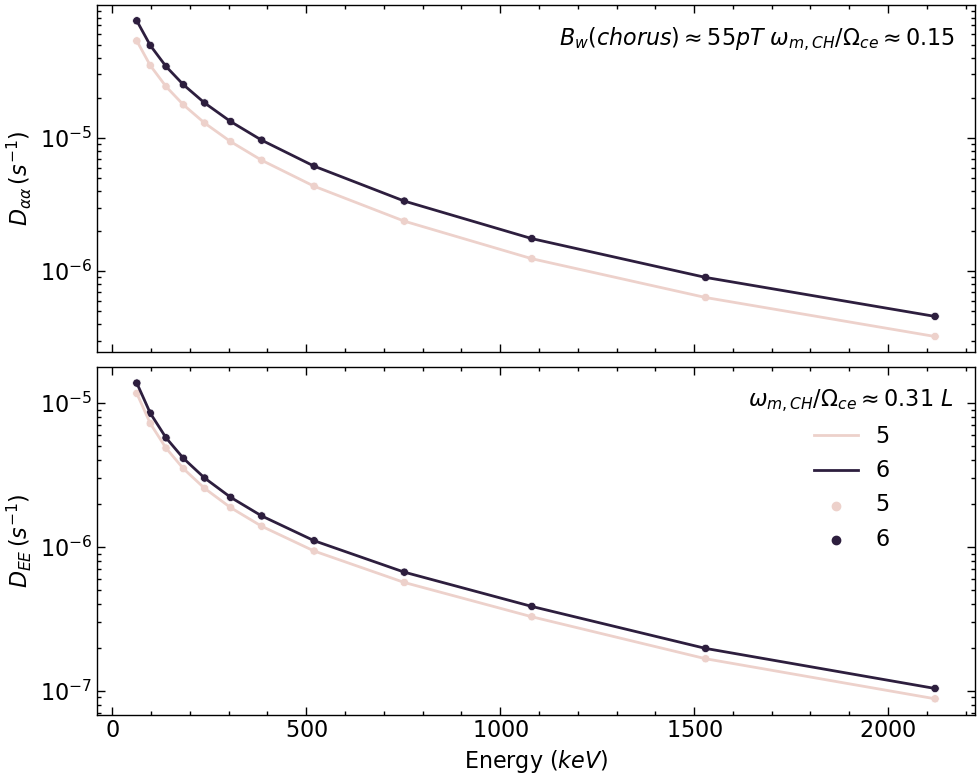

In [77]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(10, 8))


dotlineplot(
    data=D_chorus_1,
    x="energy",
    y="Daa",
    hue="L_bins",
    legend=False, 
    ax=ax1
)


dotlineplot(
    data=D_chorus_2,
    x="energy",
    y="Dee",
    hue="L_bins",
    ax=ax2
)

ax1.legend(title=r"$B_w(chorus) \approx 55 pT$ $\omega_{m,CH}/\Omega_{ce} \approx 0.15$")

properties = dict(
    xlabel=r"Energy ($keV$)",
    yscale="log",
)
ax1.set(ylabel=r"$D_{\alpha\alpha} \, (s^{-1})$", **properties)
ax2.set(ylabel=r"$D_{EE} \, (s^{-1})$", **properties)
ax2.legend(title=r"$\omega_{m,CH}/\Omega_{ce} \approx 0.31$ $L$ ")

plt.tight_layout()
fig.savefig("../figures/Dch.pdf")
